# Classification with Neural Network example

In this notebook, an example of classification using neural networks is given. For this, the MNIST dataset (https://www.tensorflow.org/datasets/catalog/mnist) is used. This dataset includes 60'000 training and 10'000 validation samples. Each sample is a 28 by 28 greyscale image depicting a number from 0 to 9. Our goal is to predict this number correctly from the image.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

import os
os.chdir("C:\\Users\\main\\Proton Drive\\laurin.koller\\My files\\ML\\repos\\OrionML")

import OrionML as orn

### Load the data

The data is saved in csv files where each row corresponds to 1 sample. The first column is the correct number depicted on the image and the remaining columns contain the information about the image. The training set is split between two csv files each containing 30'000 examples. These are loaded and then merged to one dataframe.

In [4]:
df1 = pd.read_csv("C:\\Users\\main\\Proton Drive\\laurin.koller\\My files\\ML\\repos\\OrionML\\Examples\\example data\\MNIST\\mnist_train1.csv", 
                   delimiter=",", header=None)

df2 = pd.read_csv("C:\\Users\\main\\Proton Drive\\laurin.koller\\My files\\ML\\repos\\OrionML\\Examples\\example data\\MNIST\\mnist_train2.csv", 
                   delimiter=",", header=None)

df = pd.concat([df1, df2], axis=0).reset_index(drop=True)

df_val = pd.read_csv("C:\\Users\\main\\Proton Drive\\laurin.koller\\My files\\ML\\repos\\OrionML\\Examples\\example data\\MNIST\\mnist_test.csv", 
                   delimiter=",", header=None)


df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The first 10 samples in the training set are shown below.

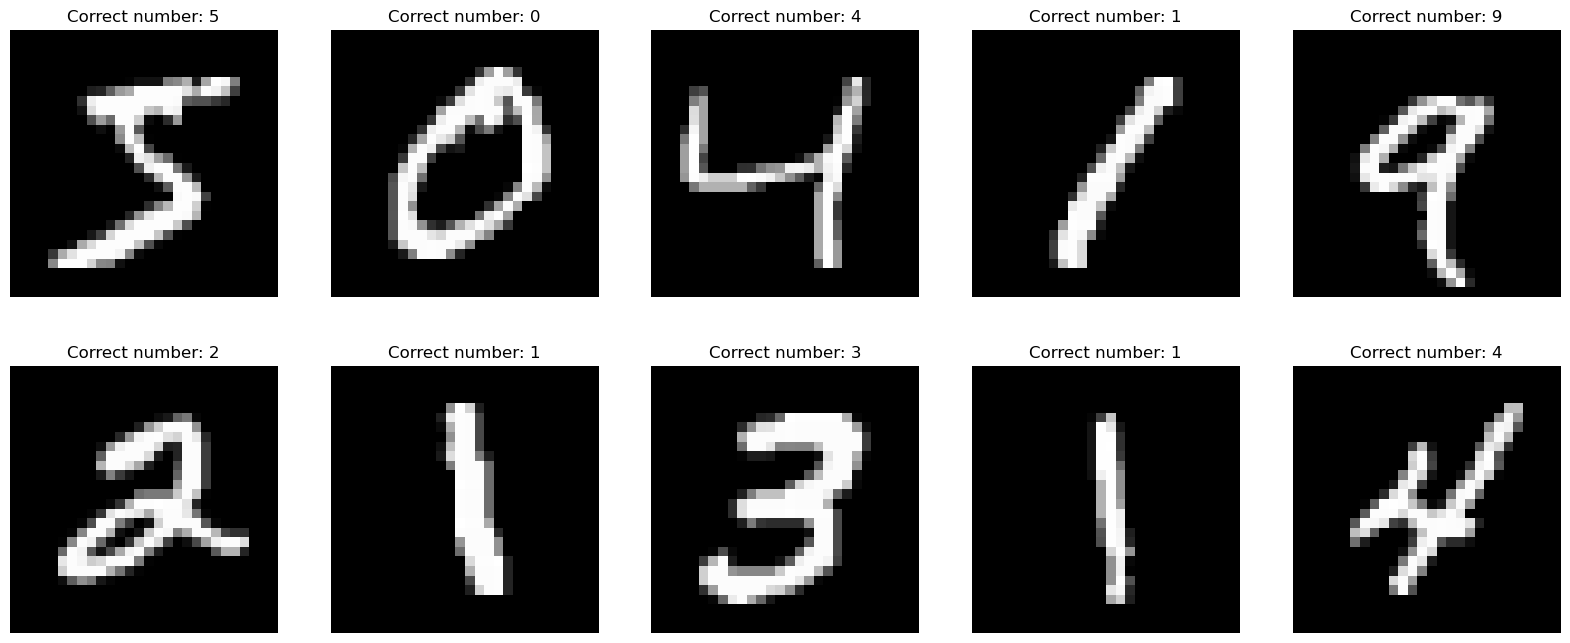

In [6]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20,8))

for index,ax in enumerate(axs.flatten()):
    curr_data = np.array(df.iloc[index])
    correct_number = curr_data[0]
    image_data = curr_data[1:].reshape(28,28)
    ax.imshow(image_data, cmap="grey")
    ax.set_title(f"Correct number: {correct_number}")
    ax.axis("off")

Below two histograms can be seen showing the number of samples for each number are in the training and validation set. Both distributions look similar and there is no number that has substantially less training or validation samples than the rest.

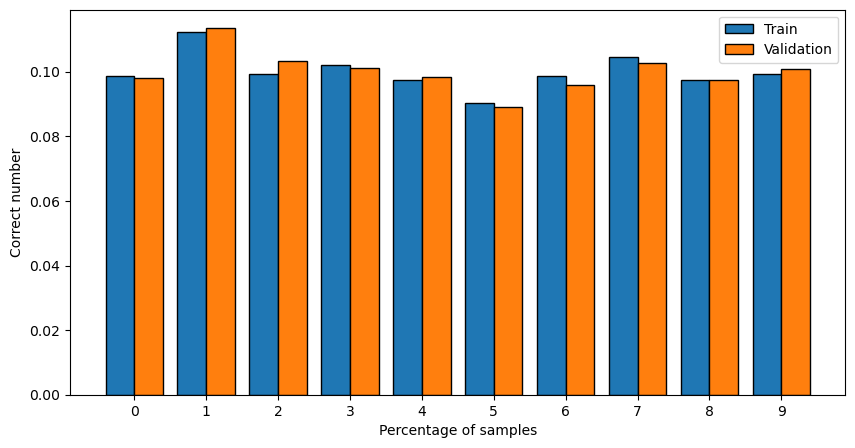

In [9]:
target_train = np.array(df)[:,0]
target_val = np.array(df_val)[:,0]

hist_train = np.array([len([val for val in target_train if val==bal]) for bal in range(10)])
hist_val = np.array([len([val for val in target_val if val==bal]) for bal in range(10)])
hist_train = hist_train/np.sum(hist_train)
hist_val = hist_val/np.sum(hist_val)

plt.figure(figsize=(10,5))

plt.bar(np.arange(10)-0.4, hist_train, width=0.4, align="edge", edgecolor="black", linewidth=1, label="Train")
plt.bar(np.arange(10)+0, hist_val, width=0.4, align="edge", edgecolor="black", linewidth=1, label="Validation")
plt.legend(loc="best")
plt.xticks(ticks=np.arange(10))
plt.xlabel(xlabel="Percentage of samples")
plt.ylabel(ylabel="Correct number")
plt.show()

# Preparing the Data

First, for both the training and validation sets the training and target data is separated.

In [11]:
np.random.seed(0)

train_X = np.array(df.iloc[:,1:])
train_y_col = np.array(df.iloc[:,0]).reshape(-1,1)
val_X = np.array(df_val.iloc[:,1:])
val_y_col = np.array(df_val.iloc[:,0]).reshape(-1,1)

train_y = np.zeros((len(train_y_col), 10))
for i in range(len(train_y)):
    train_y[i][train_y_col[i]] = 1
    
val_y = np.zeros((len(val_y_col), 10))
for i in range(len(val_y)):
    val_y[i][val_y_col[i]] = 1

Next, a Standard Scaler is used to transform the training and validation data. The scaler is fit to the training data, and this scaler is then used to transform both the train and validataion data.

In [13]:
scaler = orn.utils.StandardScaler()
train_X = scaler.fit_transform(train_X)
val_X = scaler.transform(val_X)

Now a Sequential with the structure for the Neural Network can be defined. This Sequential can be used to define a neural network. The neural network defined here used batch gradient descent and a cross entropy loss function.

In [207]:
np.random.seed(0)

seq = orn.Sequential([orn.Layer.Linear(784, 128, activation="relu"), orn.Layer.Dropout(0.25), orn.Layer.Linear(128, 64, activation="relu"), orn.Layer.Dropout(0.25),
                      orn.Layer.Linear(64, 32, activation="relu"), orn.Layer.Dropout(0.25), orn.Layer.Linear(32, 10, activation="softmax")], 
                     initializer="glorot")

nn = orn.NeuralNetwork(seq, loss="cross_entropy", optimizer="adam", learning_rate=2e-3, verbose=True)

The model is now trained with the adam optimizer and a batch size of 128.

In [210]:
nn.fit(train_X, train_y, epochs=100, batch_size=1024, validation=[val_X, val_y])

Iteration    1:
Training   Loss:    4.061, accuracy 89.0%.
Validation Loss:    3.913, accuracy 89.4%.

Iteration   10:
Training   Loss:    1.797, accuracy 95.1%.
Validation Loss:    2.056, accuracy 94.4%.

Iteration   20:
Training   Loss:     1.29, accuracy 96.5%.
Validation Loss:     1.68, accuracy 95.4%.

Iteration   30:
Training   Loss:    1.017, accuracy 97.2%.
Validation Loss:    1.411, accuracy 96.2%.

Iteration   40:
Training   Loss:   0.8191, accuracy 97.8%.
Validation Loss:    1.385, accuracy 96.2%.

Iteration   50:
Training   Loss:   0.6331, accuracy 98.3%.
Validation Loss:    1.186, accuracy 96.8%.

Iteration   60:
Training   Loss:   0.5219, accuracy 98.6%.
Validation Loss:    1.138, accuracy 96.9%.

Iteration   70:
Training   Loss:   0.4089, accuracy 98.9%.
Validation Loss:    1.079, accuracy 97.1%.

Iteration   80:
Training   Loss:   0.3561, accuracy 99.0%.
Validation Loss:    1.076, accuracy 97.1%.

Iteration   90:
Training   Loss:   0.2904, accuracy 99.2%.
Validation Los

The model is clearly overfitting. Adding a regularizer would be the most promising approach to counter the overfitting. In the plot below, the loss of one batch of the training data in each epoch can be seen.

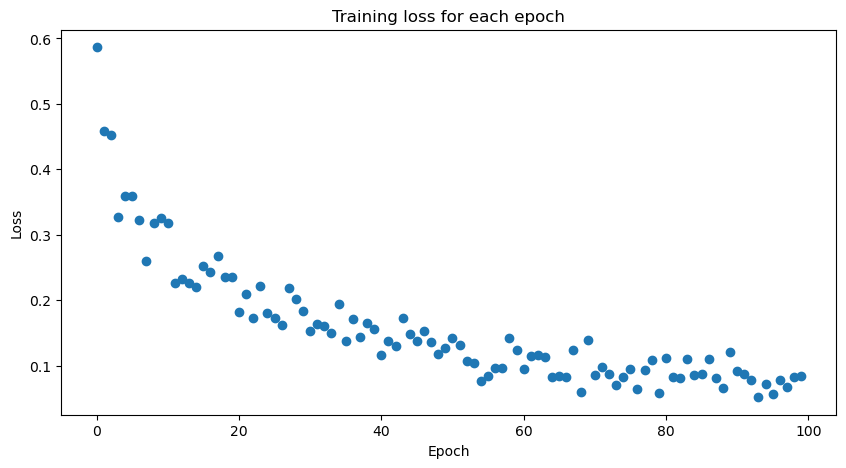

In [213]:
plt.figure(figsize=(10,5))

J_h = nn.J_h
plt.scatter(np.arange(len(J_h)), J_h, label="Training loss")
plt.xlabel(xlabel="Epoch")
plt.ylabel(ylabel="Loss")
plt.title("Training loss for each epoch")
#plt.yscale("log")
plt.show()

In [226]:
np.random.seed(0)

y_pred = seq(val_X)
pred = np.array([np.random.multinomial(1,val) for val in y_pred])
same_arr = np.array([np.array_equal(val_y[i], pred[i]) for i in range(len(val_y))])
wrong_num = len(val_y)-np.sum(same_arr)
acc = np.sum(same_arr)/len(val_y)

print(f"Number of wrong predictions: {wrong_num:3.0f}.")
print(f"Percentage of correctly predicted samples: {round(100*acc, 1):2.1f}%.")

Number of wrong predictions: 274.
Percentage of correctly predicted samples: 97.3%.


Let's take a look at the confusion matrix.

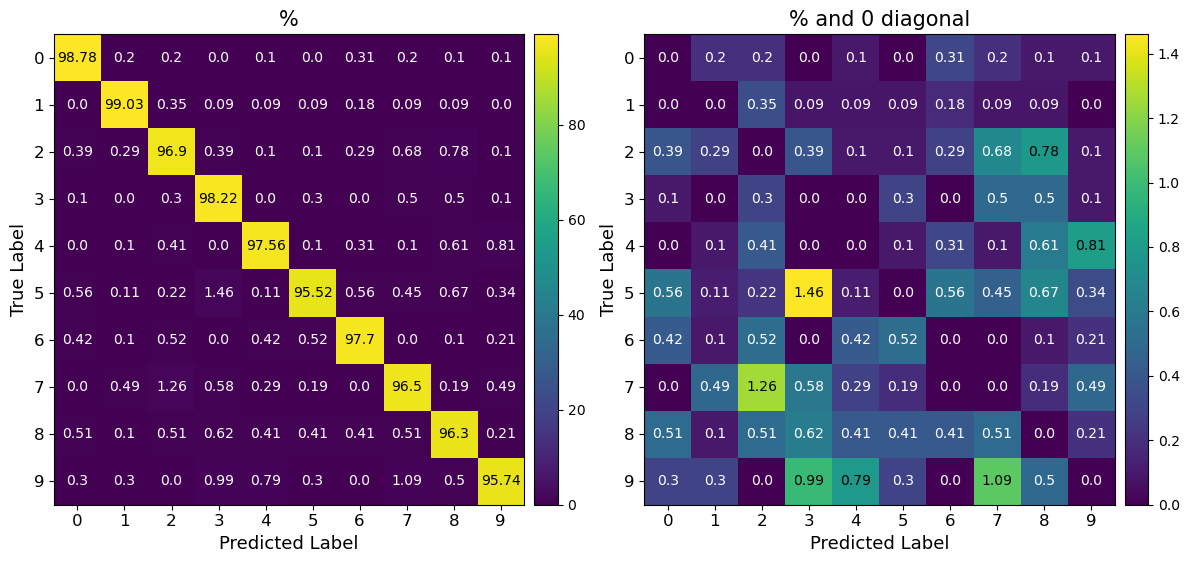

In [229]:
cfm = confusion_matrix(np.argmax(val_y, axis=1), np.argmax(pred, axis=1))
labels = [str(val) for val in range(10)]

orn.utils.plot_confusion_matrix(cfm, labels)